In [1]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

In [2]:
dwarf="UMa_III"
ext = True

## Parse IRFs

In [3]:
runlist = printRunList(dwarf, package="EventDisplay", ext=ext, log_only=True)


for i, run in tqdm(enumerate(runlist), total=len(runlist)):
    ResponseFunction.EventDisplay(dwarf, run, from_log=True,
                                  mode="all", export=True, verbose=False, ext=ext)

  0%|          | 0/27 [00:00<?, ?it/s]

## Parse Events

In [4]:
Likelihood.EventDisplay.initialize(dwarf = dwarf, effCut=0.15, biasCut=0.2, export=False, ext=ext)

Events (dwarf: UMa_III) are saved in /raid/reedbuck/lrizk/dark_matter/Data/EventDisplay_Events_UMa_III_ext.npy.


Warning in <TClass::Init>: no dictionary for class VEvndispRunParameter is available
Warning in <TClass::Init>: no dictionary for class VGlobalRunParameter is available
Warning in <TClass::Init>: no dictionary for class VImageCleaningRunParameter is available
Warning in <TClass::Init>: no dictionary for class VTMVAEvaluatorResults is available
Warning in <TClass::Init>: no dictionary for class VTMVAEvaluatorData is available
Warning in <TClass::Init>: no dictionary for class VGammaHadronCuts is available
Warning in <TClass::Init>: no dictionary for class VAnalysisUtilities is available
Warning in <TClass::Init>: no dictionary for class VTimeMask is available
Warning in <TClass::Init>: no dictionary for class VAnaSumRunParameter is available
Warning in <TClass::Init>: no dictionary for class pair<int,VAnaSumRunParameterDataClass> is available
Warning in <TClass::Init>: no dictionary for class VAnaSumRunParameterDataClass is available
Warning in <TClass::Init>: no dictionary for class VA

## Check Event Distribution

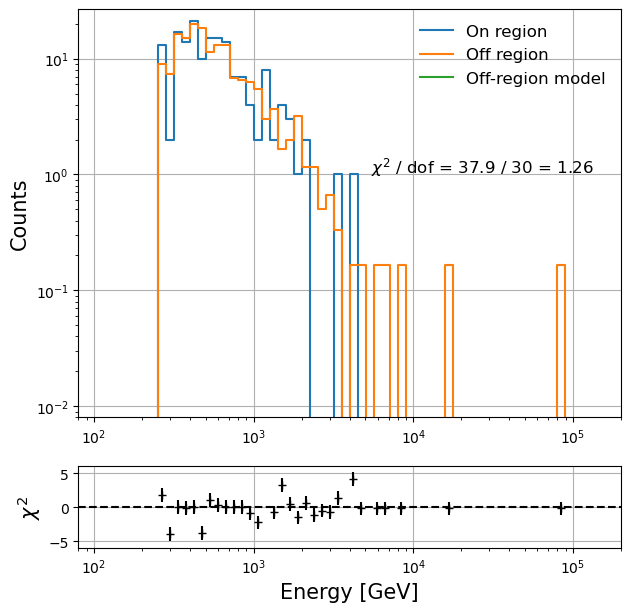

In [5]:
plotData(dwarf, ext=ext)

## Check J profile

In [6]:
help(JProfile.calcJval)

Help on function calcJval in module DarkMatter.JProfile.profile:

calcJval(dwarf, seed=-1, gJProf=None, props=[], deg=None, **kwargs)



In [7]:
help(np.cumsum)

Help on _ArrayFunctionDispatcher in module numpy:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See :ref:`ufuncs-output-

In [8]:
help(JProfile.generateConvolvedJ)

Help on function generateConvolvedJ in module DarkMatter.JProfile.convolution:

generateConvolvedJ(dwarf, package='EventDisplay', filename=None, irf=None, gJProf=None, th2Cut=0, version='all', seed=-1, return_array=False, save_array=False, ext=False, step=0.004, verbose=True, **kwargs)



log10(J factor) at 0.1 degree is 21.06


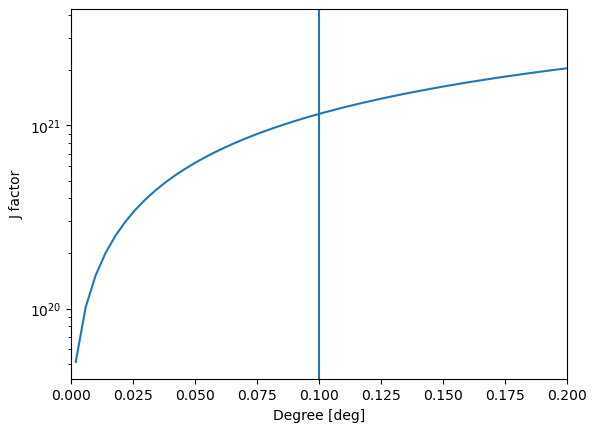

In [9]:
plt.plot(*JProfile.calcJval("UMa_III").T)
plt.xlabel("Degree [deg]")
plt.ylabel("J factor")
plt.yscale("log")
plt.xlim(0, 0.2)
plt.axvline(0.1)
jf = JProfile.calcJval("UMa_III", deg=0.1)
print(f"log10(J factor) at 0.1 degree is {np.log10(jf):.2f}")

## Generate convolved J profile

In [10]:
jprofile_iii = JProfile.generateConvolvedJ("UMa_III", ext=True, return_array=True)

  0%|          | 0/30 [00:00<?, ?it/s]

Text(0, 0.5, 'Convolved J factor')

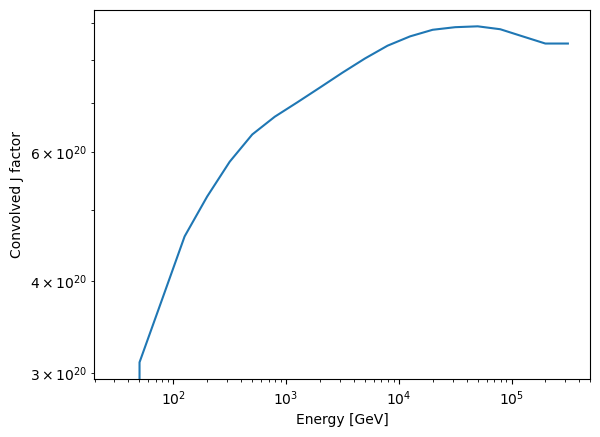

In [11]:
plt.plot(*jprofile_iii[0].T)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy [GeV]")
plt.ylabel("Convolved J factor")

## Compute an expected DM spectrum

In [12]:
channel= "tt"
M = 1000
hg_1d = Likelihood.combinedCalcSignal(dwarf, M, "EventDisplay", channel=channel, ext=ext)

(<cppyy.gbl.TCanvas object at 0x55e8f7bfdfc0>,
 <cppyy.gbl.TH1D object at 0x55e8f60ff3c0>)

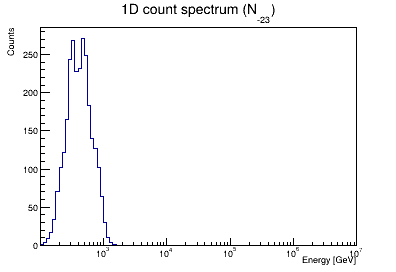

In [13]:
plotRoot(hg_1d, logx=True)

## Compute an upper limit

In [14]:
mle_1d = Likelihood.MLE(dwarf, M, channel=channel, ext=ext, signu=-25) 
mle_1d.minuit(method=2)

[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = -0.00 (M=1000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-25.244) (equivalent to 5.70e-26)
[Log, Result] b = 1000 +/- 41 (null value: 1000)
 **********
 **    1 **SET PRINT           0
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 b            1.00026e+03  1.00000e-01    7.00180e+02  1.00000e+07
     2 signu        1.00000e+00  1.00000e-02   -2.00000e+01  5.00000e+00
     3 package      1.22000e+02  constant
 **********
 **    2 **FIX           3
 **********
 PARAMETER    3  IS CONSTANT.   IGNORED.
 **********
 **    3 **SET ERRDEF           1
 **********
 **********
 **    4 **MIGRAD       1e+04           1
 **********
 MIGRAD MINIMIZATION H

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 b            9.99874e+02  1.00000e-02    8.75571e+02  1.12418e+03
     2 signu       -1.00000e+00  1.00000e-02   -6.00000e+00  9.00000e+00
 **********
 **    9 **SCAN            1         100
 **********
 FCN=-5458.71 FROM SCAn        STATUS=IMPROVED       99 CALLS         652 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS      PHYSICAL LIMITS       
  NO.   NAME      VALUE            ERROR       NEGATIVE      POSITIVE  
   1  b            9.98592e+02   1.00000e-02   8.75571e+02   1.12418e+03
   2  signu       -1.00000e+00   1.00000e-02  -6.00000e+00   9.00000e+00
   3  package      1.22000e+02   constant   
                               ERR DEF= 1.35
 **********
 **   10 **SCAN            2         100
 **********
 MINUIT WARNING IN SCAn      
 ============== VARIABLE2 IS AT ITS LOWER ALLOWED LIMIT.
 FCN=-5458.82 FROM

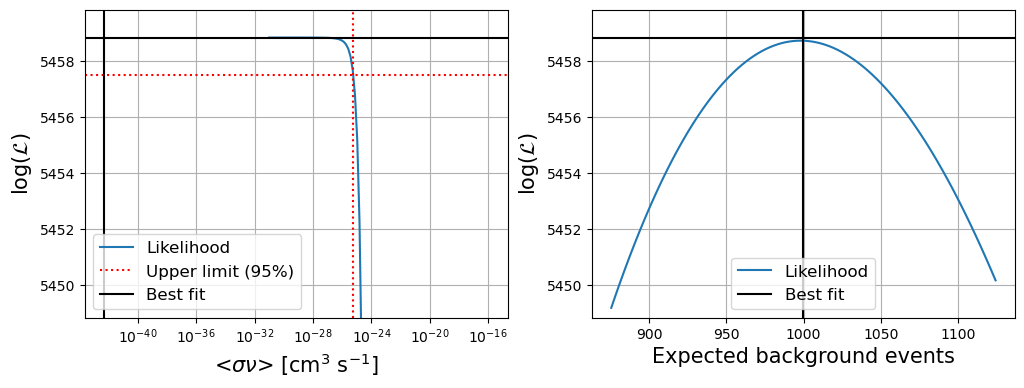

In [15]:
mle_1d.plotProfileLikelihood()

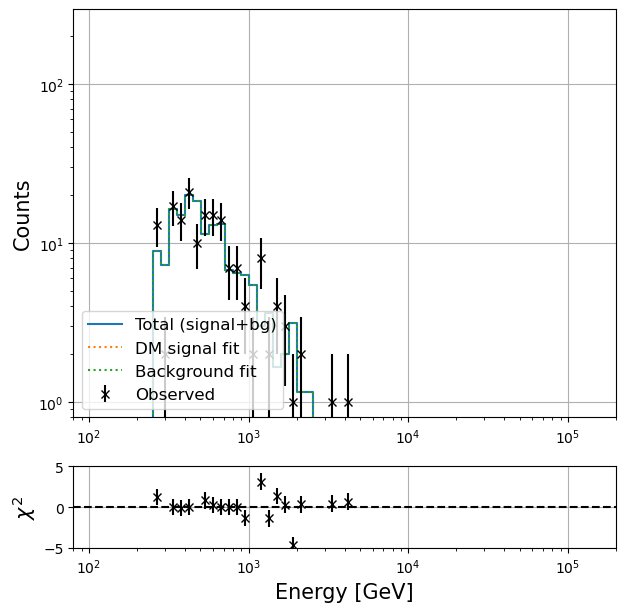

In [16]:
mle_1d.plotSED()

## Compute UL curve

[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_III
[Log] Channel      : tt
[Log] Dataset      : Extended (theta2=0.008)
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

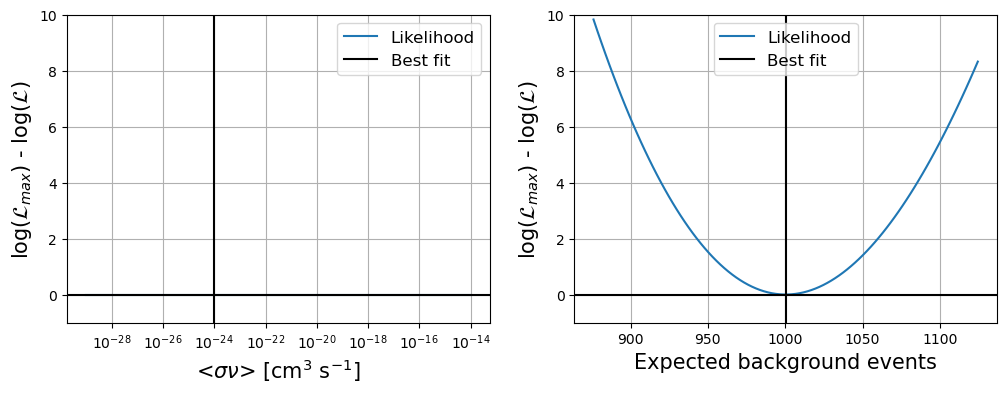

[Log, Error] The upper limit is not estimated (M=0.100 TeV).
[Log] Upper limits are saved in '/raid/reedbuck/lrizk/dark_matter/Output/test_UMa_III.npy'
 **********
 **    1 **SET PRINT           0
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 b            1.00026e+03  1.00000e-01    7.00180e+02  1.00000e+07
     2 signu        1.00000e+00  1.00000e-02   -2.00000e+01  5.00000e+00
     3 package      1.60000e+02  constant
 **********
 **    2 **FIX           3
 **********
 PARAMETER    3  IS CONSTANT.   IGNORED.
 **********
 **    3 **SET ERRDEF           1
 **********
 **********
 **    4 **MIGRAD       1e+04           1
 **********
 MINUIT WARNING IN HESSE
 ============== Second derivative zero for parameter2
  MNHESS FAILS AND WILL RETURN DIAGONAL MATRIX. 
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.
 MINUIT WARNING IN HESSE
 ============== Second derivative zero for parameter2
  MNHESS FAILS

Warning in <TROOT::Append>: Replacing existing TH1: hOff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hg_1D (Potential memory leak).


In [17]:
filename="test_UMa_III"
OUTPUT = Likelihood.calcUpperLimits(dwarf, channel,  method=2, filename=filename, ext=ext, signu=-25)

(0.1, 100)

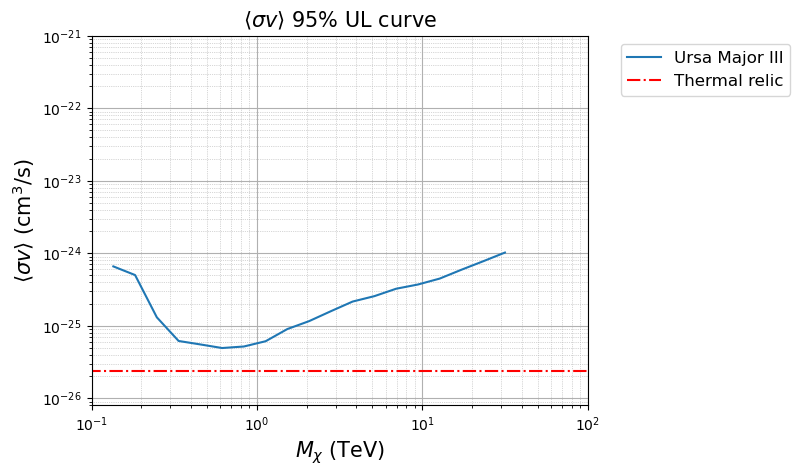

In [18]:
# I don't have UL curves for UMa1, UMa2, or Segue1.
#Likelihood.plotULcurve(f"EventDisplay_Segue_1_tt", units="TeV", ls="--", lw=2, label="Segue 1", color="C1", log_label=False, addRelic=False)
#Likelihood.plotULcurve(f"EventDisplay_UMa_II_tt", units="TeV", ls=":", lw=3, label="Ursa Major II", color="k", log_label=False, addRelic=False)
#Likelihood.plotULcurve(f"EventDisplay_UMi_tt", units="TeV", ls=(0, (3, 5, 1, 5, 1, 5)), lw=3, label="Ursa Minor", color="C3", log_label=False, addRelic=False)
plotULcurve("test_UMa_III",units="TeV", addRelic=True, label="Ursa Major III")
plt.ylim(8e-27, 1e-21)
plt.xlim(0.1, 100)